In [593]:
#SalaryData_Test

In [594]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid',palette='viridis')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [595]:
#Read The Dataset
df = pd.read_csv('https://raw.githubusercontent.com/KJanhavi2424/My-Datasets/main/SalaryData_Test.csv')
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [596]:
df2 = df.drop(columns=['workclass','education','maritalstatus','occupation','relationship','race','capitalloss','native','sex'])
df2

,age,educationno,capitalgain,hoursperweek,Salary
0,25,7,0,40,<=50K
1,38,9,0,50,<=50K
2,28,12,0,40,>50K
3,44,10,7688,40,>50K
4,34,6,0,30,<=50K
...,...,...,...,...,...
15055,33,13,0,40,<=50K
15056,39,13,0,36,<=50K
15057,38,13,0,50,<=50K
15058,44,13,5455,40,<=50K


In [597]:
df2.describe()

,age,educationno,capitalgain,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,40.951594
std,13.380676,2.558727,7703.181842,12.062831
min,17.000000,1.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,99.000000


In [598]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           15060 non-null  int64 
 1   educationno   15060 non-null  int64 
 2   capitalgain   15060 non-null  int64 
 3   hoursperweek  15060 non-null  int64 
 4   Salary        15060 non-null  object
dtypes: int64(4), object(1)
memory usage: 588.4+ KB


In [599]:
#Model Building

In [600]:
x = df2.iloc[:,:-1]
y = df2['Salary']

In [601]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.5,random_state=1)

In [602]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)
ypred

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [603]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

       <=50K       0.79      0.96      0.87      5689
        >50K       0.63      0.21      0.32      1841

    accuracy                           0.78      7530
   macro avg       0.71      0.59      0.59      7530
weighted avg       0.75      0.78      0.73      7530



In [604]:
print('Training Accuary:' , nb.score(xtrain,ytrain))

Training Accuary: 0.7739707835325366


In [605]:
print('Test Accuracy:' , nb.score(xtest,ytest))

Test Accuracy: 0.7762284196547145


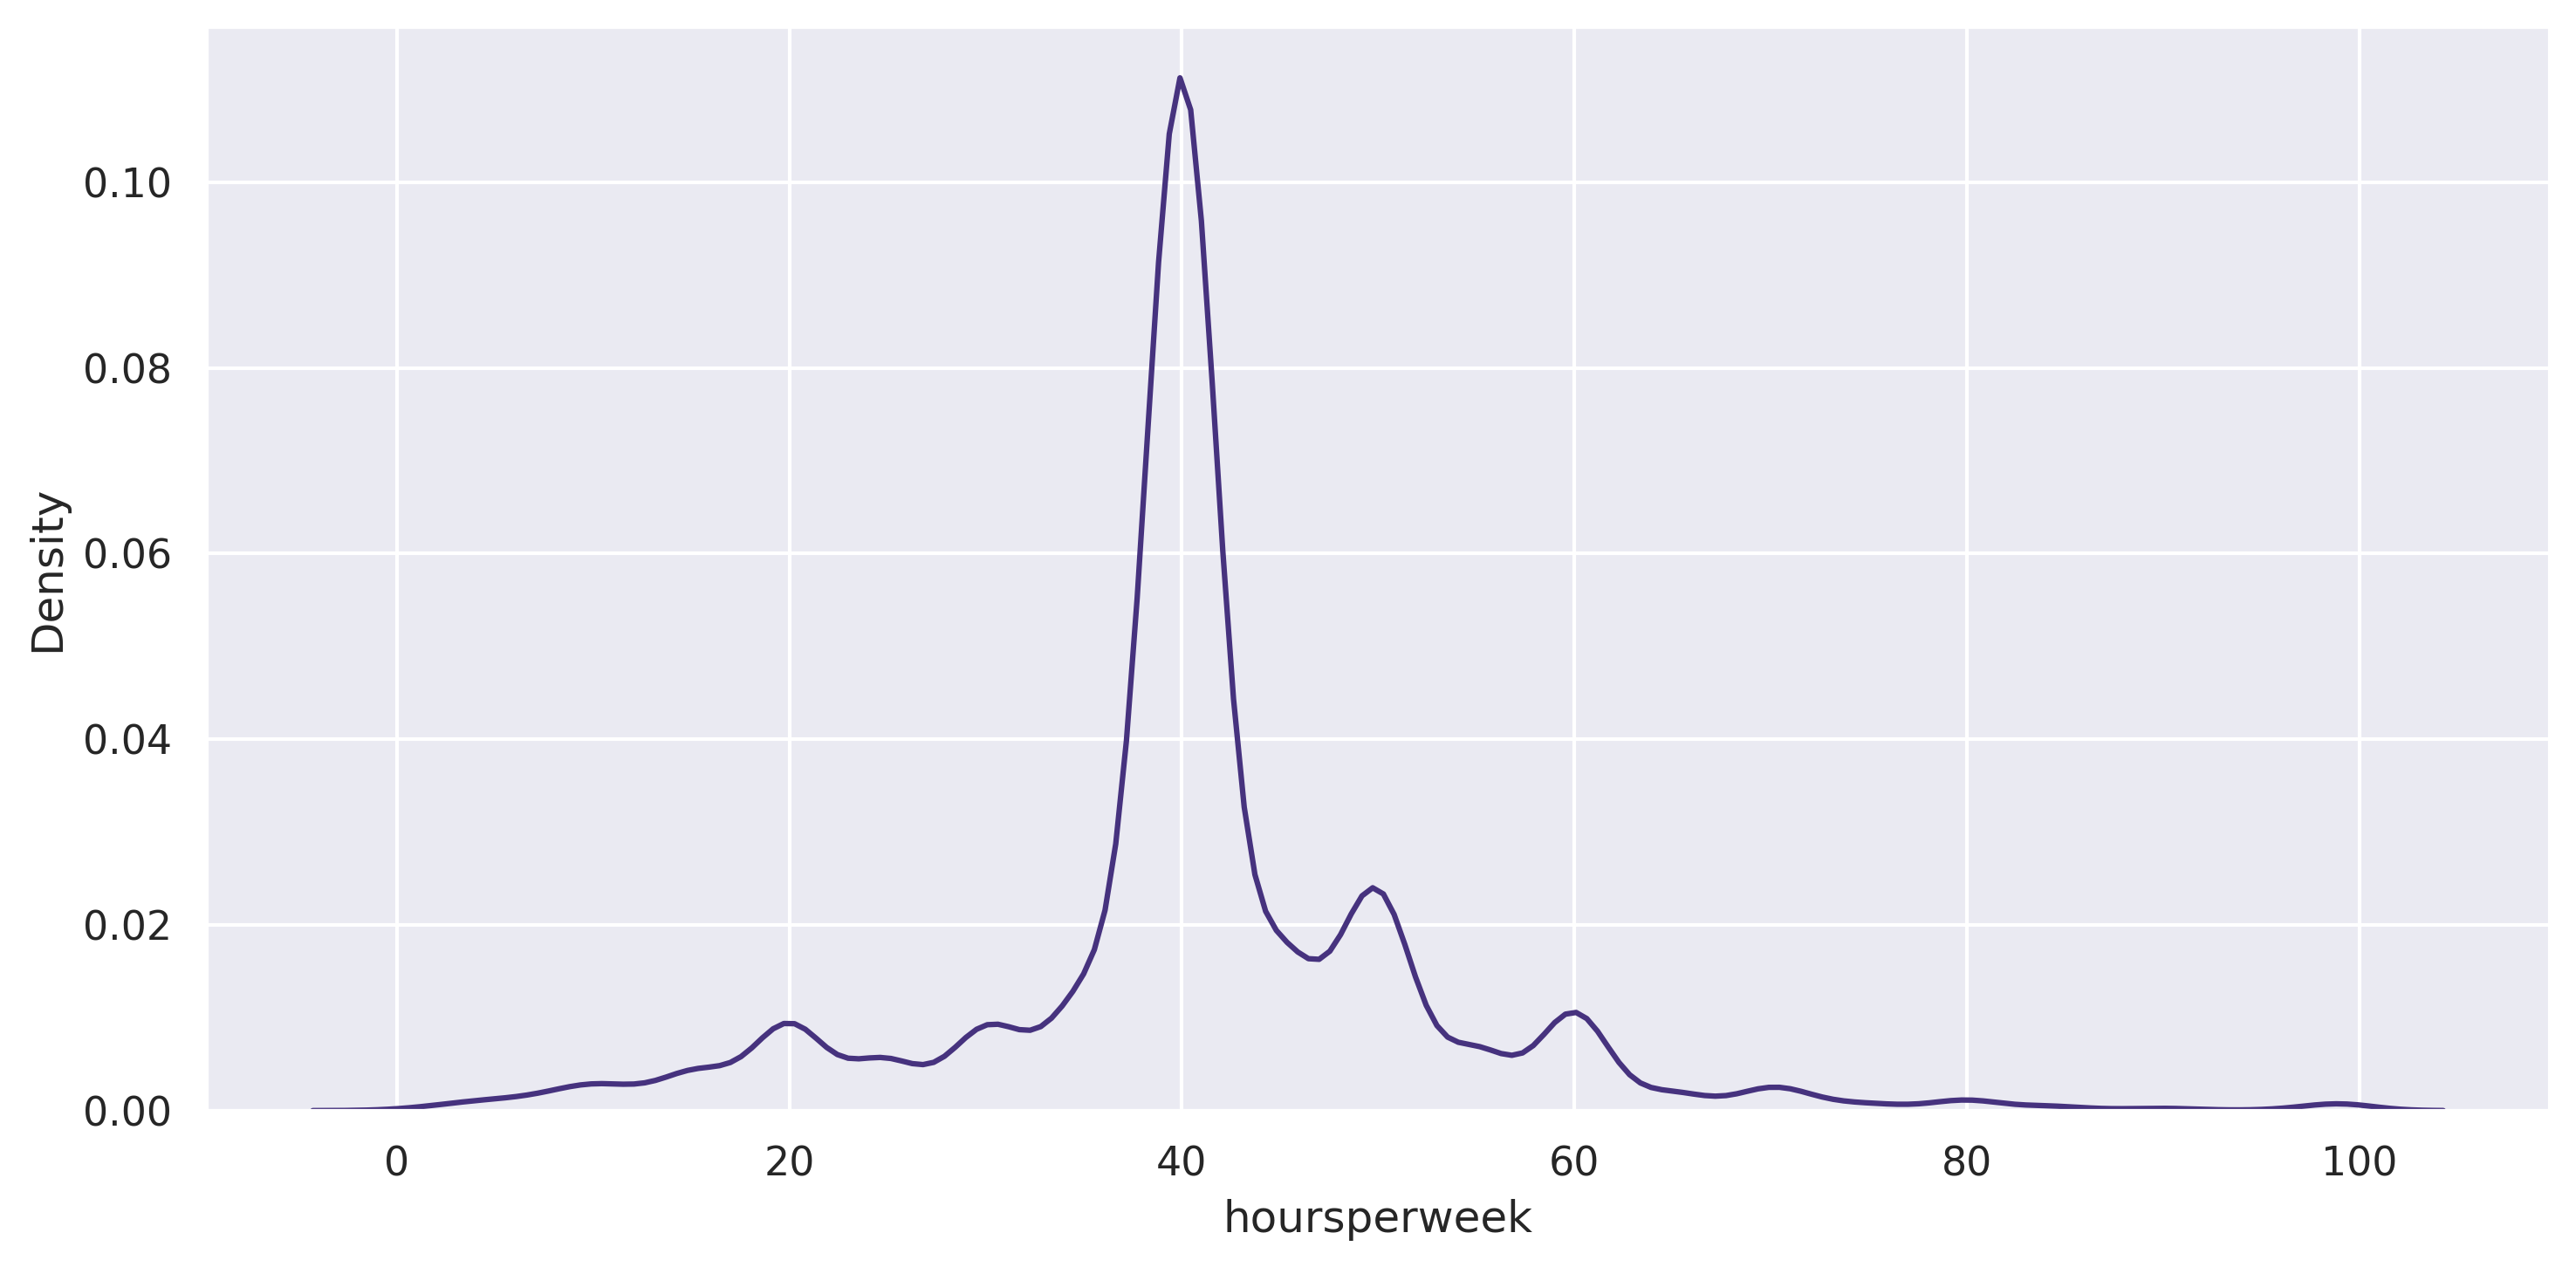

In [606]:
#Visualizations
sns.kdeplot(x=df2['hoursperweek'])
plt.tight_layout()
plt.show()

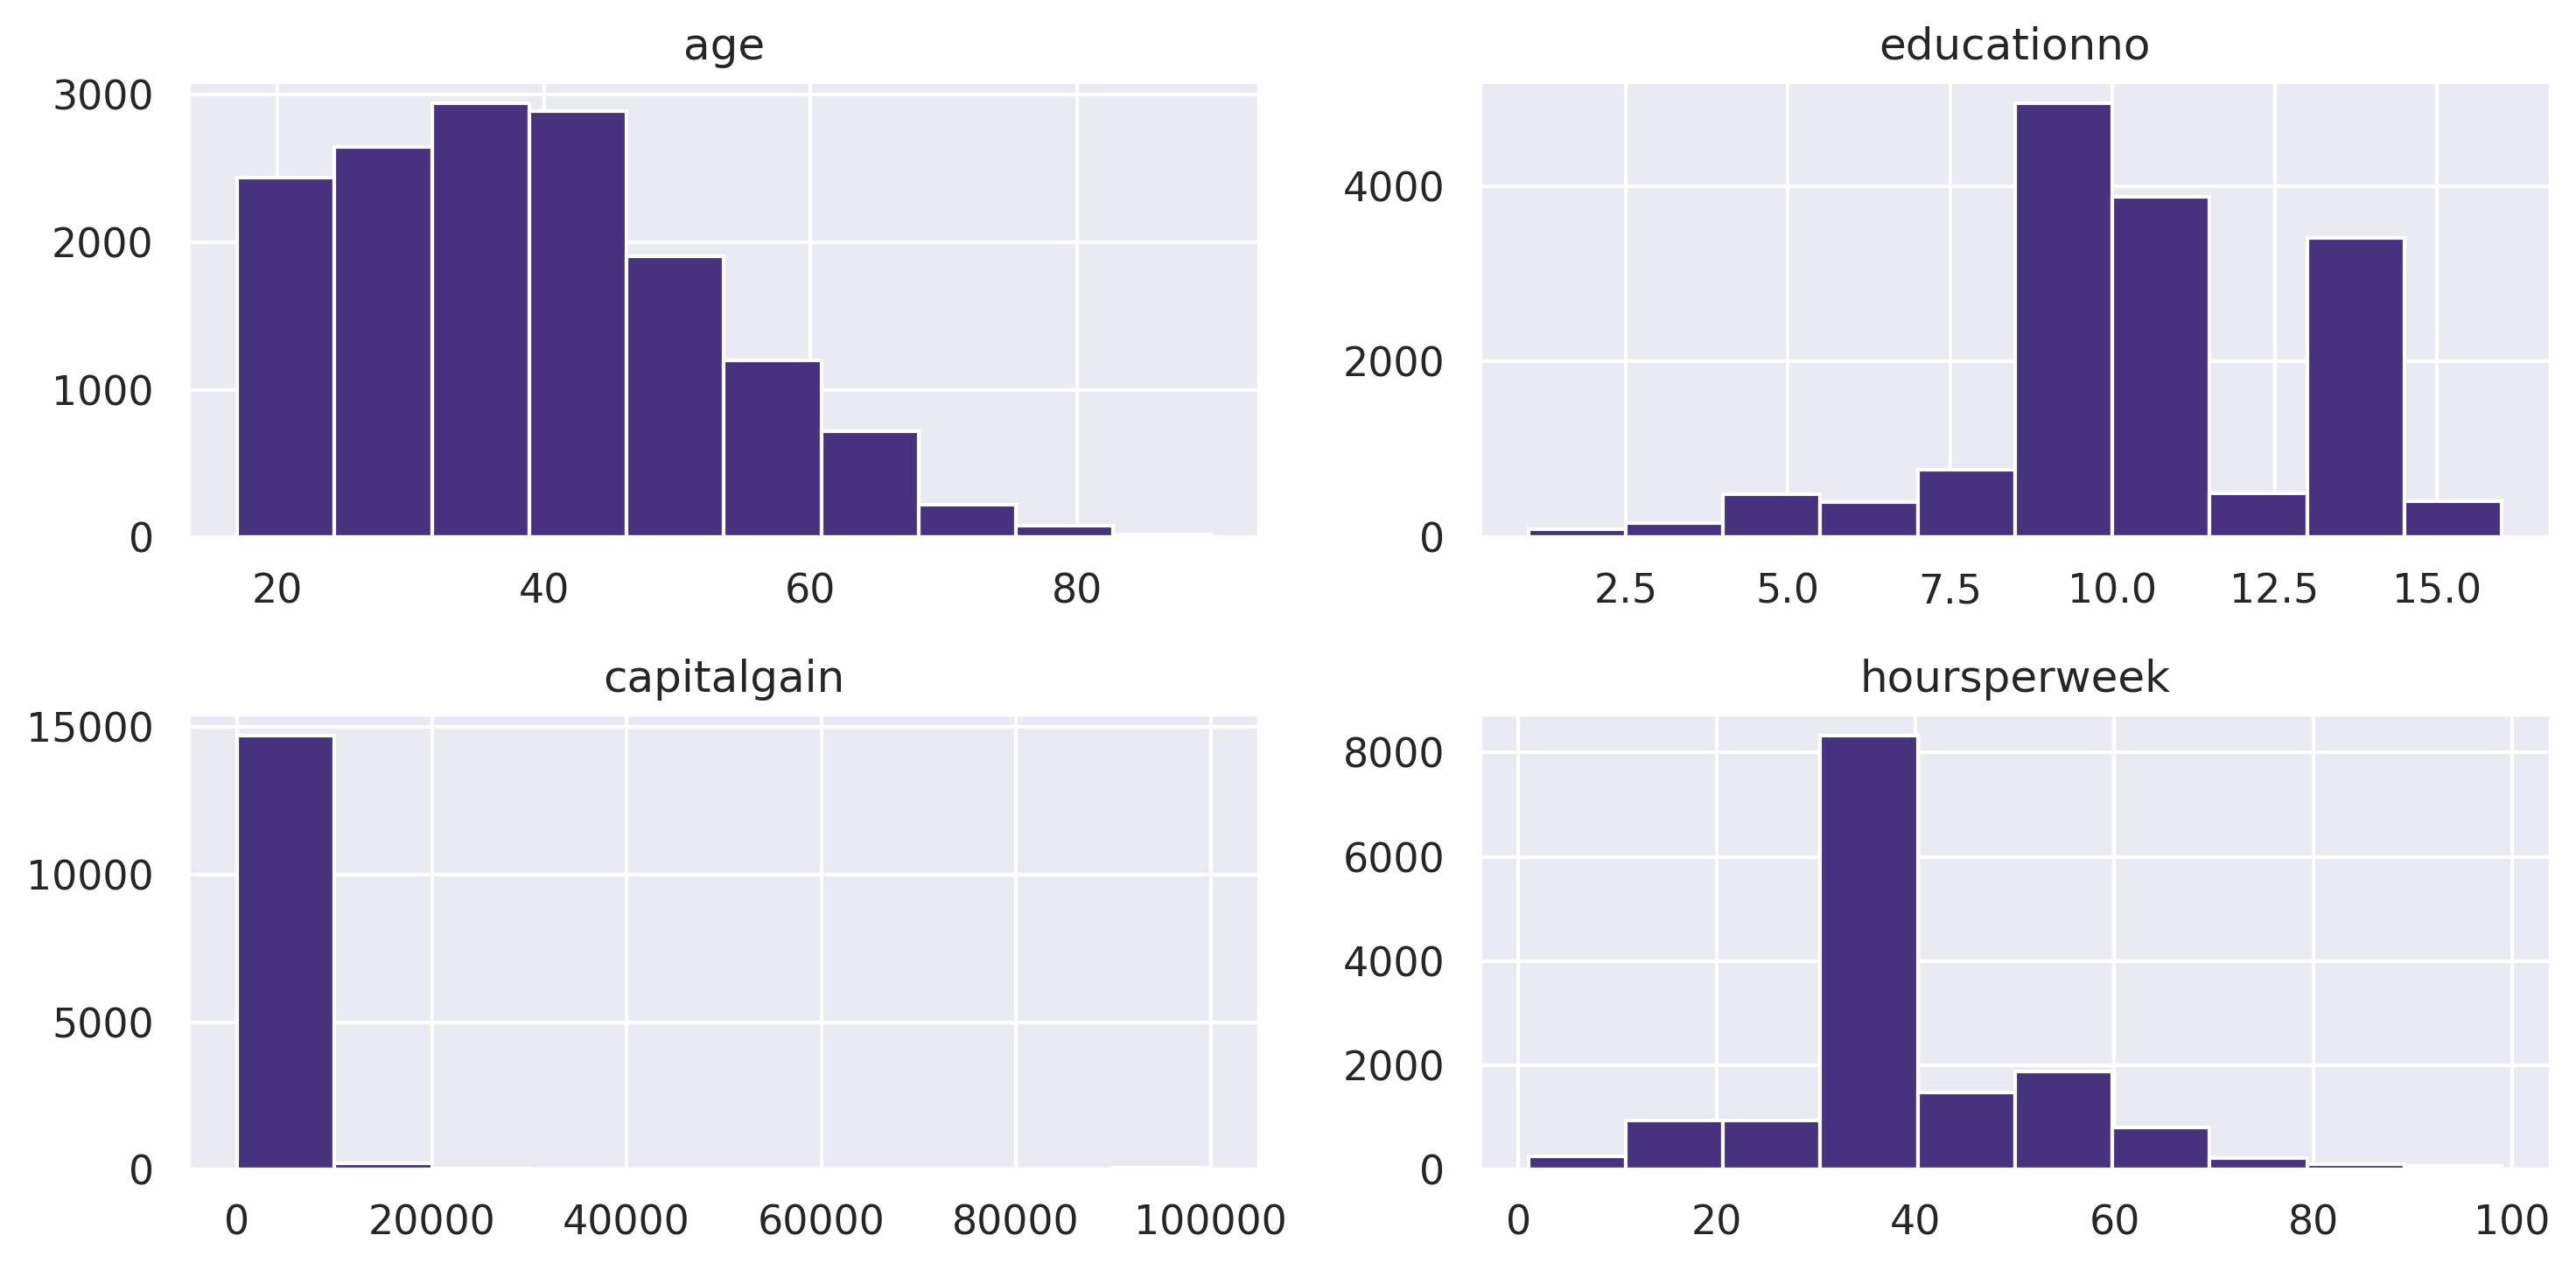

In [607]:
df2.hist()
plt.tight_layout()
plt.show()

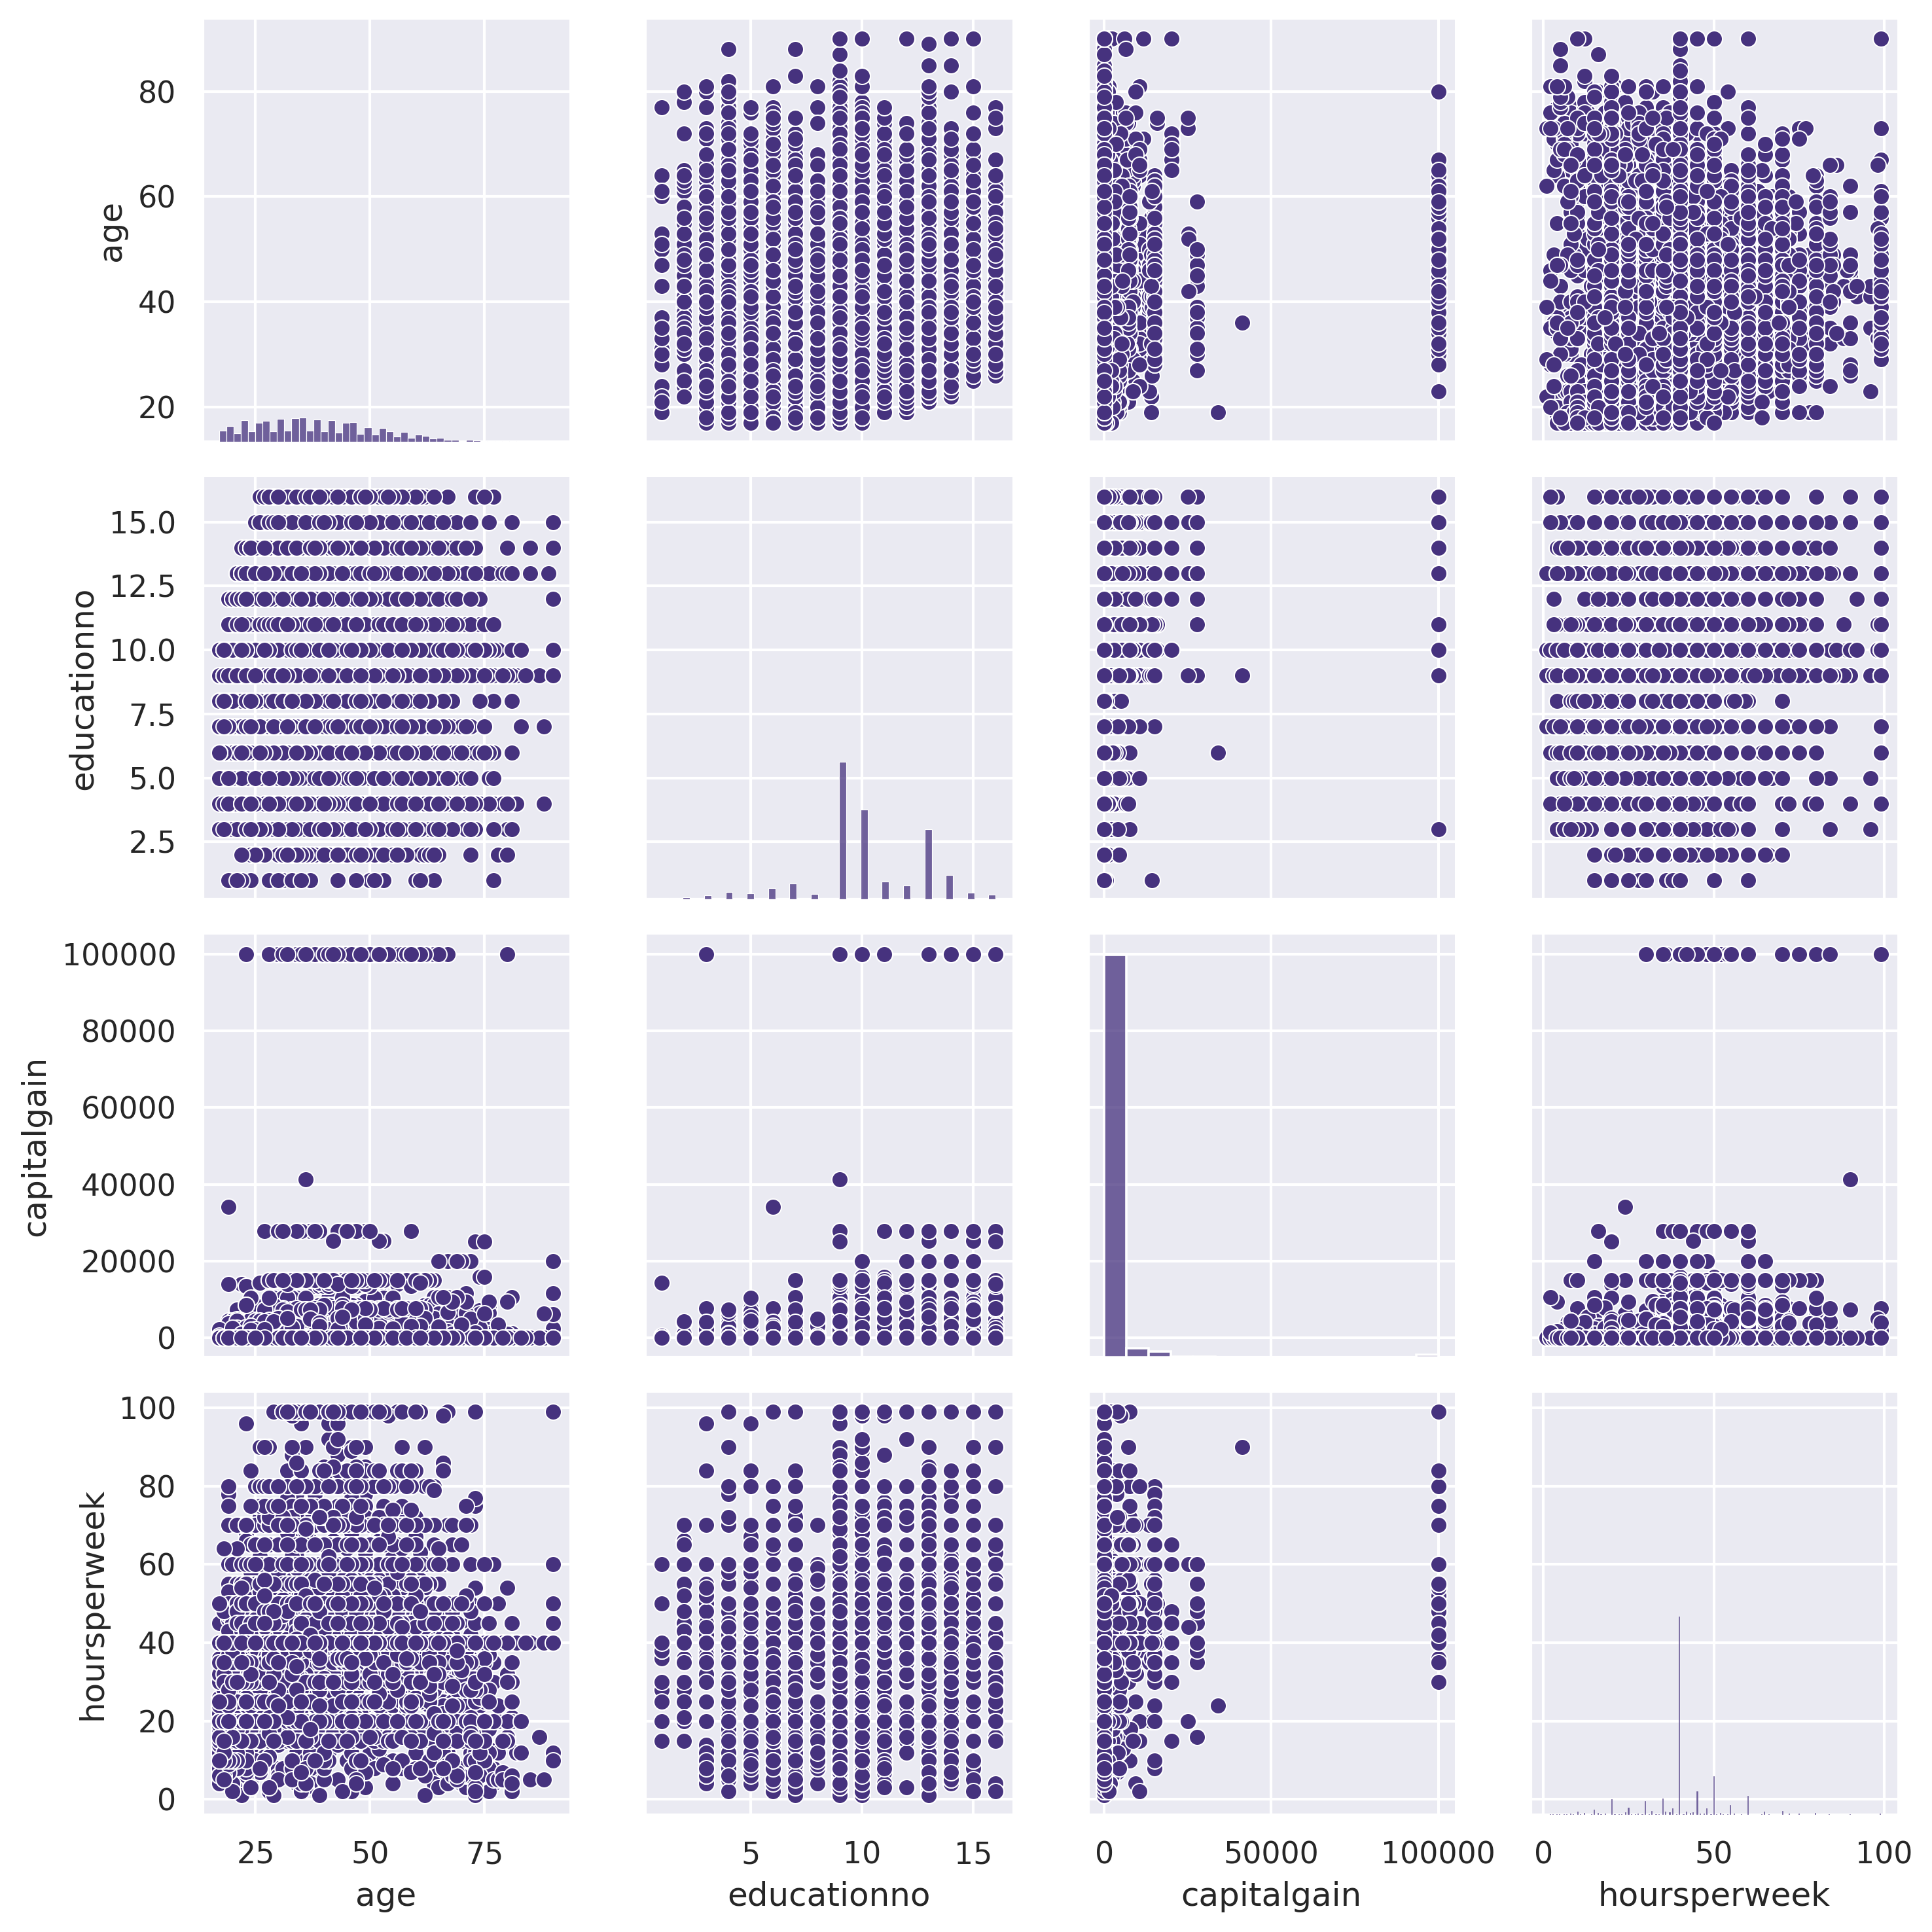

In [608]:
sns.pairplot(df2)
plt.tight_layout()
plt.show()

In [609]:
#SalaryData_Train

In [610]:
#Read The Dataset
df = pd.read_csv('https://raw.githubusercontent.com/KJanhavi2424/My-Datasets/main/SalaryData_Train.csv')
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [611]:
df3 = df.drop(columns=['workclass','education','maritalstatus','occupation','relationship','race','capitalloss','Salary','sex'])
df3

,age,educationno,capitalgain,hoursperweek,native
0,39,13,2174,40,United-States
1,50,13,0,13,United-States
2,38,9,0,40,United-States
3,53,7,0,40,United-States
4,28,13,0,40,Cuba
...,...,...,...,...,...
30156,27,12,0,38,United-States
30157,40,9,0,40,United-States
30158,58,9,0,40,United-States
30159,22,9,0,20,United-States


In [612]:
df3.describe()

,age,educationno,capitalgain,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,40.931269
std,13.134830,2.550037,7406.466611,11.980182
min,17.000000,1.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,99.000000


In [613]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           30161 non-null  int64 
 1   educationno   30161 non-null  int64 
 2   capitalgain   30161 non-null  int64 
 3   hoursperweek  30161 non-null  int64 
 4   native        30161 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [614]:
#Model Building

In [615]:
x = df3.iloc[:,:-1]
y = df3['native']

In [616]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.5,random_state=1)

In [617]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)
ypred

array([' Yugoslavia', ' Haiti', ' Yugoslavia', ..., ' Haiti', ' Haiti',
       ' Haiti'], dtype='<U27')

In [618]:
print(classification_report(ytest,ypred))

                             precision    recall  f1-score   support

                   Cambodia       0.00      0.00      0.00        10
                     Canada       0.00      0.00      0.00        48
                      China       0.00      0.00      0.00        34
                   Columbia       0.00      0.00      0.00        23
                       Cuba       0.00      0.00      0.00        34
         Dominican-Republic       0.00      0.03      0.01        38
                    Ecuador       0.00      0.00      0.00        18
                El-Salvador       0.00      0.00      0.00        48
                    England       0.00      0.00      0.00        40
                     France       0.00      0.00      0.00        11
                    Germany       0.00      0.00      0.00        63
                     Greece       0.00      0.00      0.00        15
                  Guatemala       0.00      0.00      0.00        33
                      Haiti      

In [619]:
print('Training Accuary:' , nb.score(xtrain,ytrain))

Training Accuary: 0.004177718832891247


In [620]:
print('Test Accuracy:' , nb.score(xtest,ytest))

Test Accuracy: 0.003580664412174259


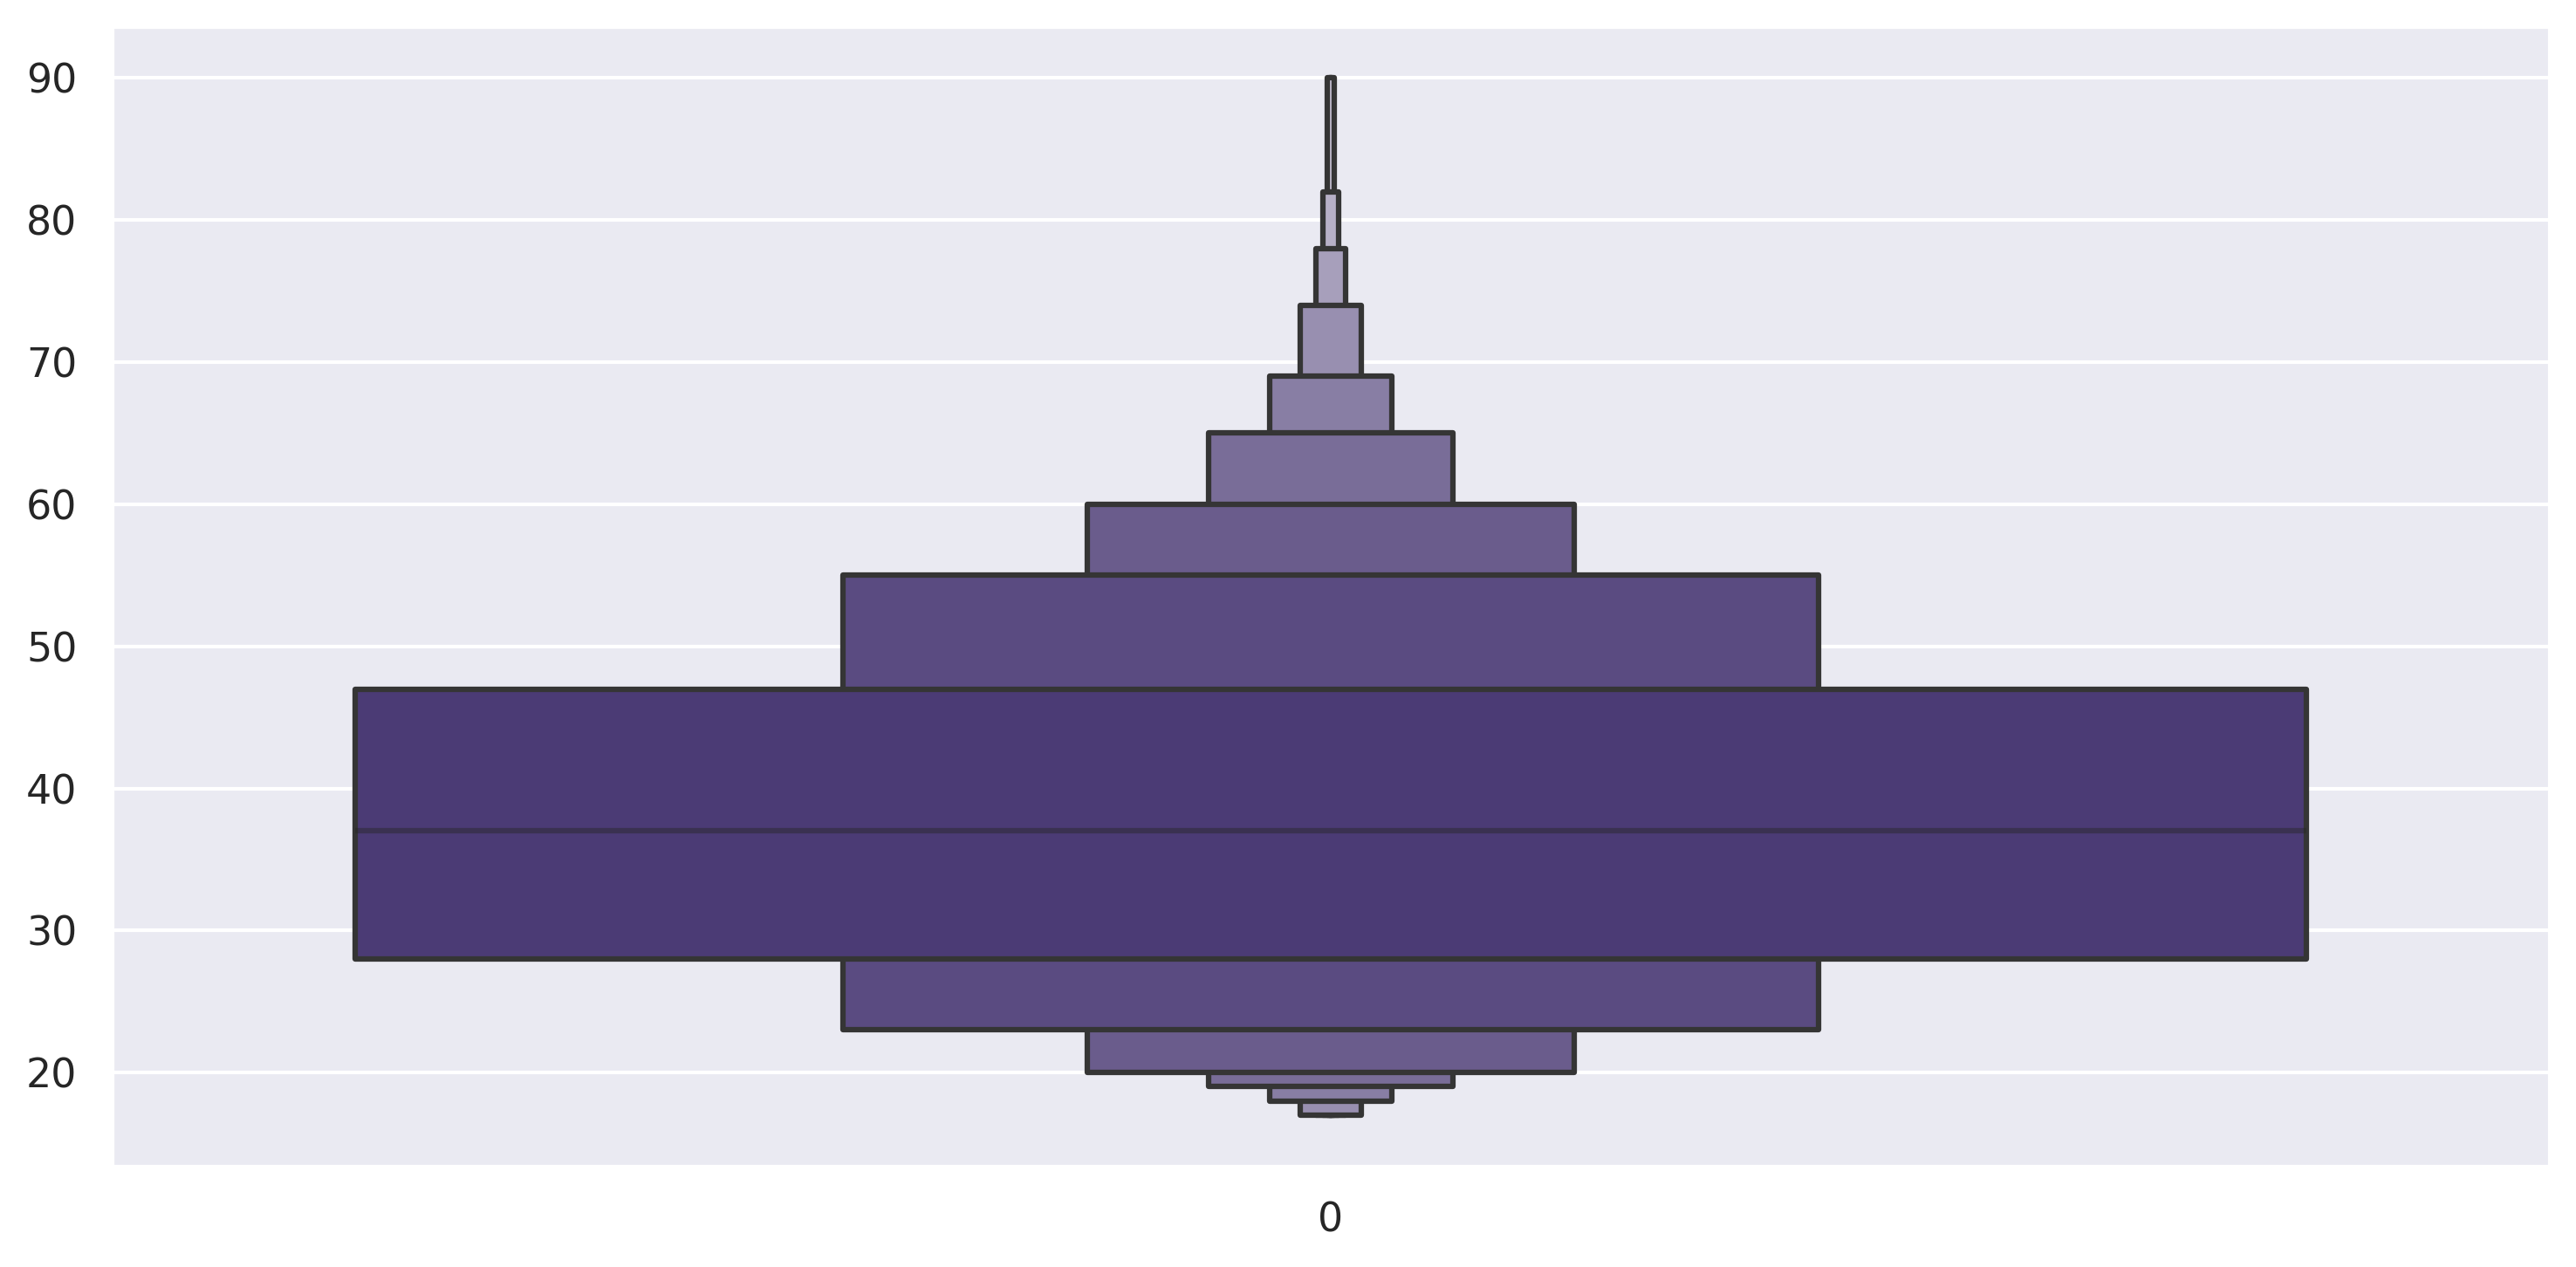

In [621]:
#Visualizations
sns.boxenplot(df3['age'])
plt.tight_layout()
plt.show()

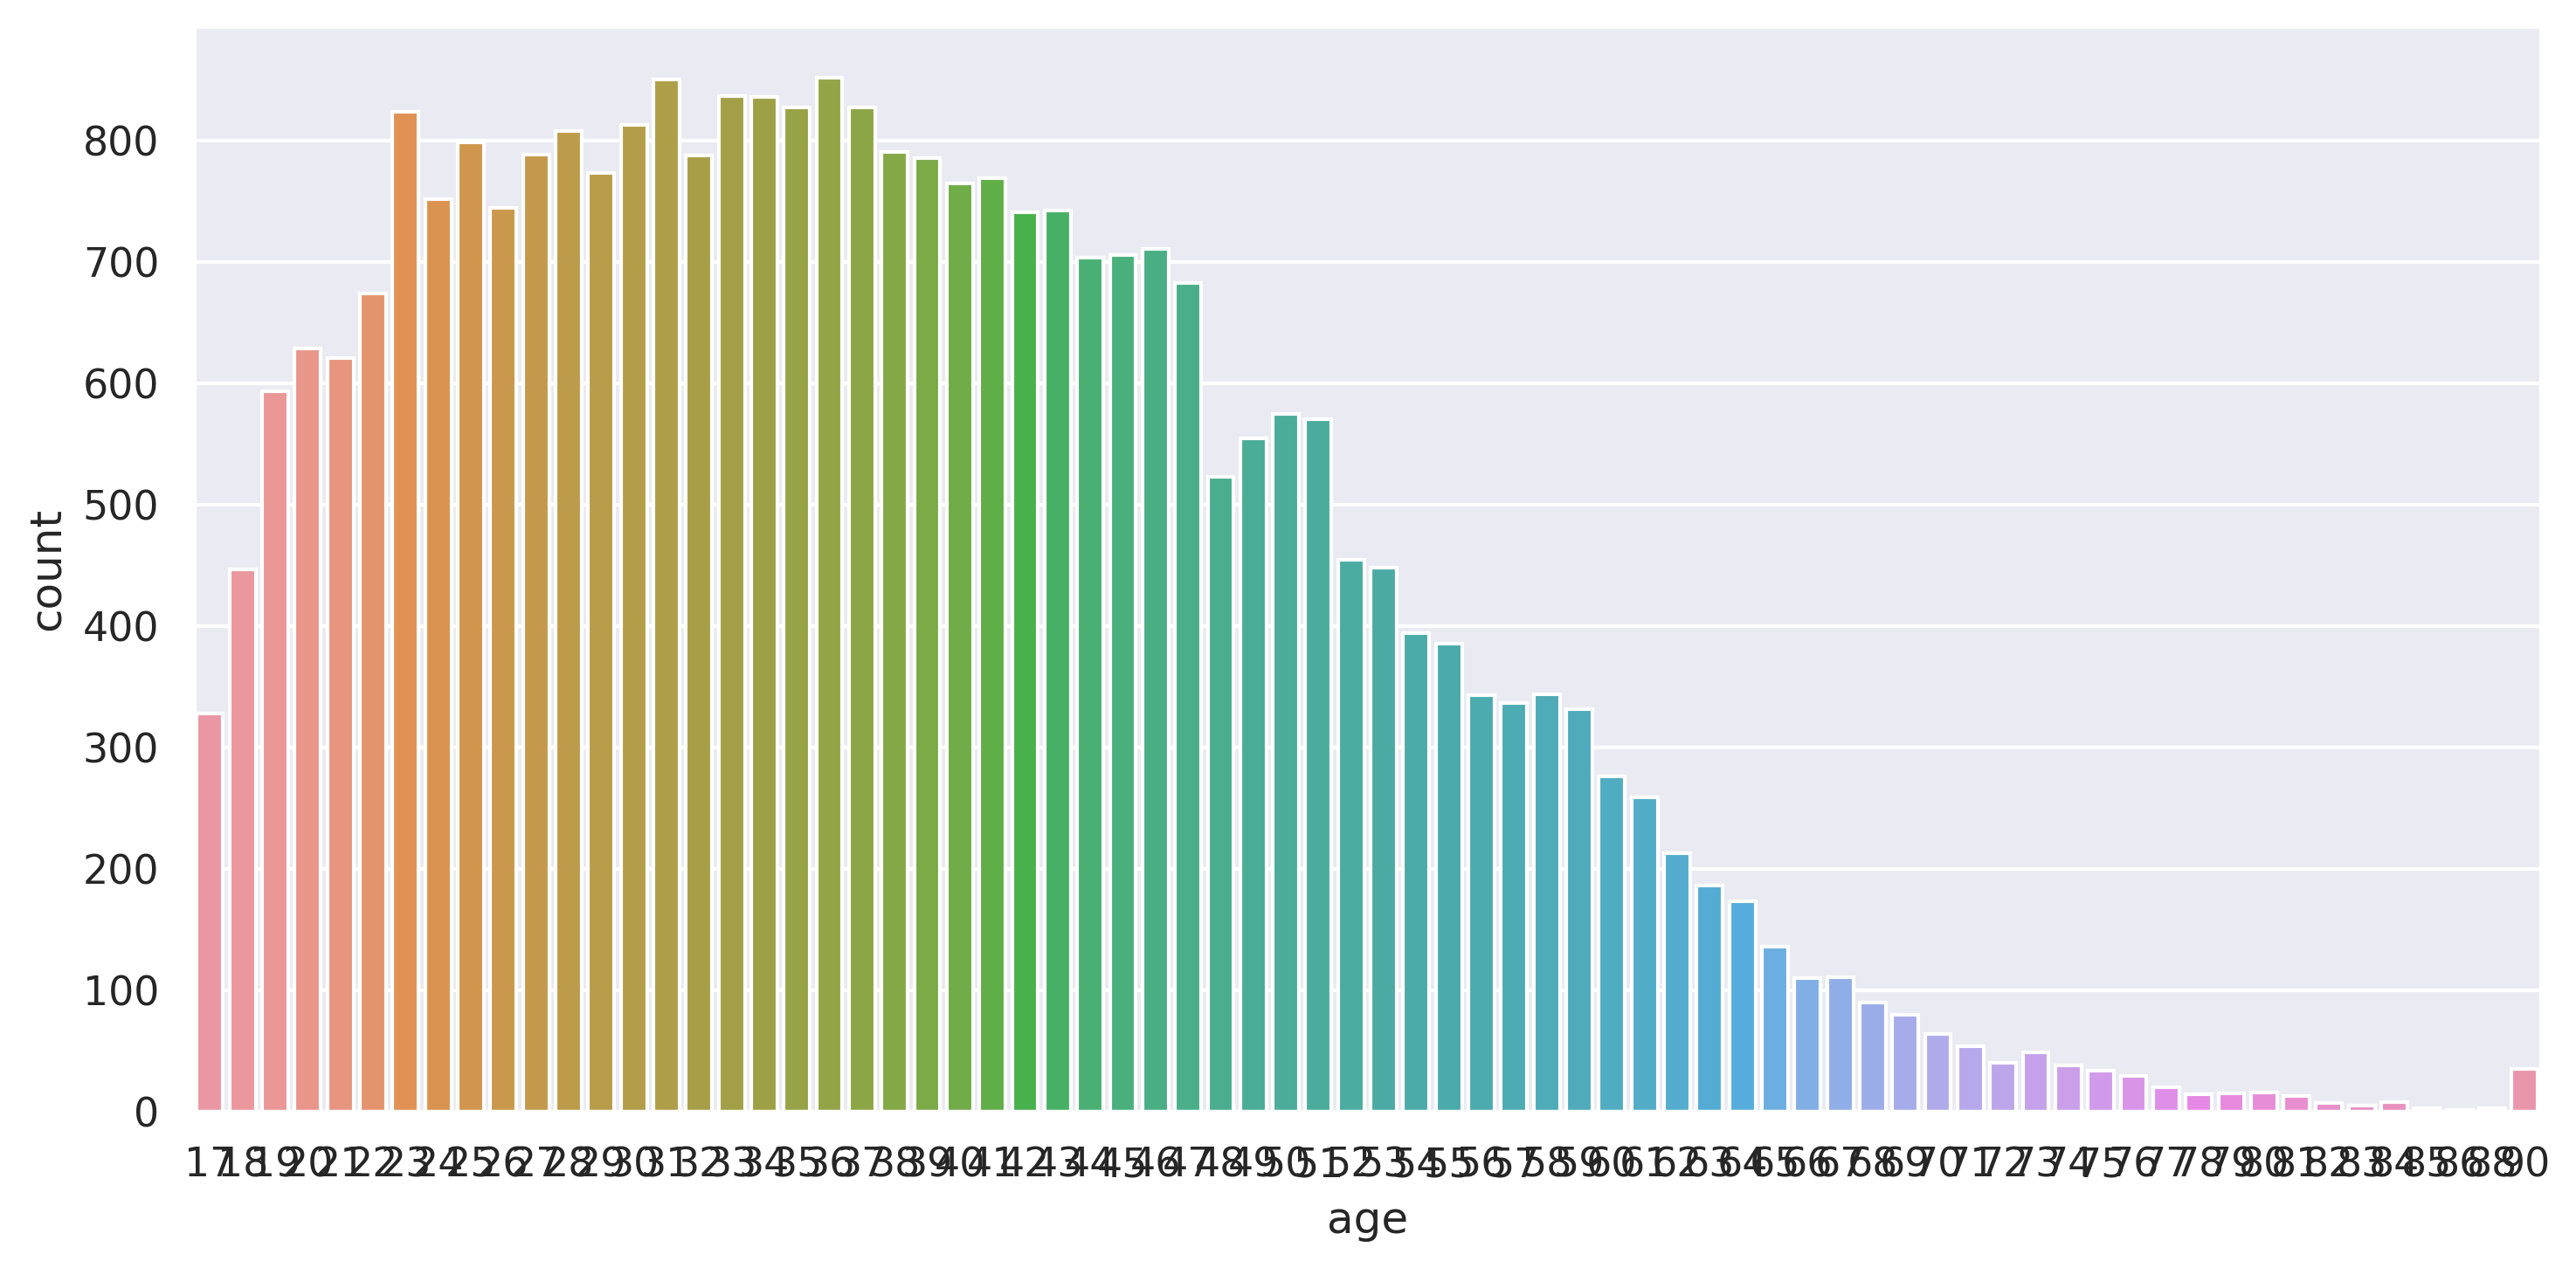

In [622]:
sns.countplot(x = df3['age'])
plt.tight_layout()
plt.show()